In [1]:
import os

output_directory = os.path.join('..', 'docs')
os.makedirs(output_directory, exist_ok=True)

print(f'se creó el directorio {output_directory}')

se creó el directorio ..\docs


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('../files/input/shipping-data.csv', sep=',')
dataset

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


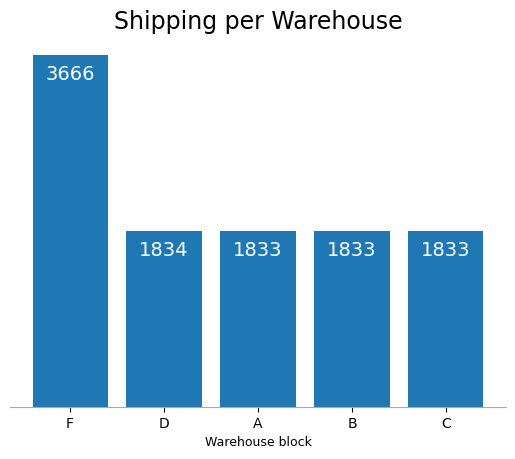

<Figure size 640x480 with 0 Axes>

In [3]:
warehouse_block_count = dataset['Warehouse_block'].value_counts()

fig, ax = plt.subplots()

for warehouse_block, count in warehouse_block_count.items():
    ax.bar(
       warehouse_block,
       count,
       color='tab:blue'
    )

    ax.text(
        x=warehouse_block,
        y=count - 300,
        s=str(count),
        ha='center',
        va='bottom',
        fontsize=14,
        color='white'
    )

ax.set_title('Shipping per Warehouse', fontsize=17)
ax.set_xlabel('Warehouse block', fontsize=9)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('darkgrey')
ax.get_yaxis().set_visible(False)

path_bar = os.path.join(output_directory, 'shipping_per_warehouse.png')
plt.savefig(path_bar)

plt.show()

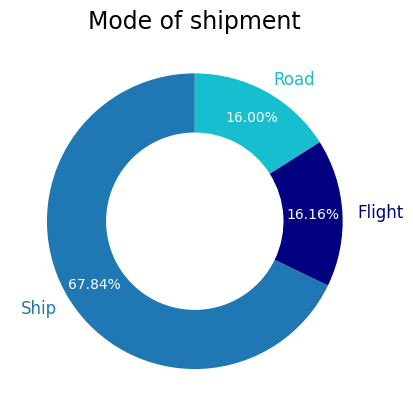

<Figure size 640x480 with 0 Axes>

In [4]:
mode_of_shipment_count = dataset['Mode_of_Shipment'].value_counts()

colors =['tab:blue', 'navy', 'tab:cyan',]

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
        x=mode_of_shipment_count,
        labels=mode_of_shipment_count.index,
        wedgeprops={'width':0.4},
        colors=colors,
        autopct='%1.2f%%',
        startangle=90,
        pctdistance=0.8,
)

ax.set_title('Mode of shipment', fontsize=17)

for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')

for text, color in zip(texts, colors):
    text.set_fontsize(12)
    text.set_color(color)

path_pie = os.path.join(output_directory, 'mode_of_shipment.png')
plt.savefig(path_pie)

plt.show()

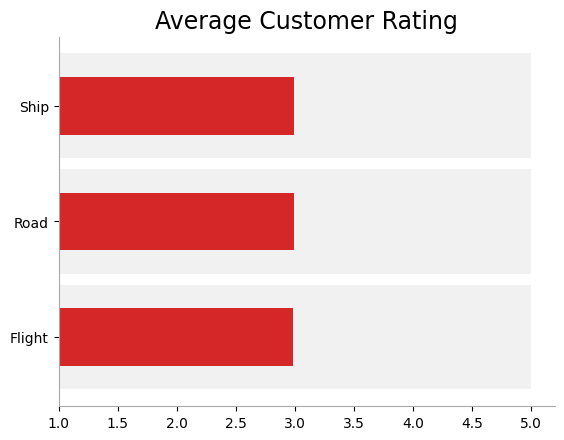

<Figure size 640x480 with 0 Axes>

In [5]:
average_customer_rating = dataset.groupby('Mode_of_Shipment')['Customer_rating'].describe()
average_customer_rating = average_customer_rating[['mean', 'min', 'max']]

fig, ax = plt.subplots()

ax.barh(
    y=average_customer_rating.index.values,
    width=average_customer_rating['max'].values -1,
    left=average_customer_rating['min'].values,
    height=0.9,
    color='gainsboro',
    alpha=0.4
)

colors = ['tab:green' if value >= 3 else 'tab:red' for value in average_customer_rating['mean'].values]

ax.barh(
    y=average_customer_rating.index.values,
    width=average_customer_rating['mean'].values -1,
    left=average_customer_rating['min'].values,
    color=colors,
    height=0.5,
    alpha=1
)

ax.set_title('Average Customer Rating', fontsize=17)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('darkgrey')
ax.spines['bottom'].set_color('darkgrey')

path_barh = os.path.join(output_directory, 'average_customer_rating.png')
plt.savefig(path_barh)

plt.show()

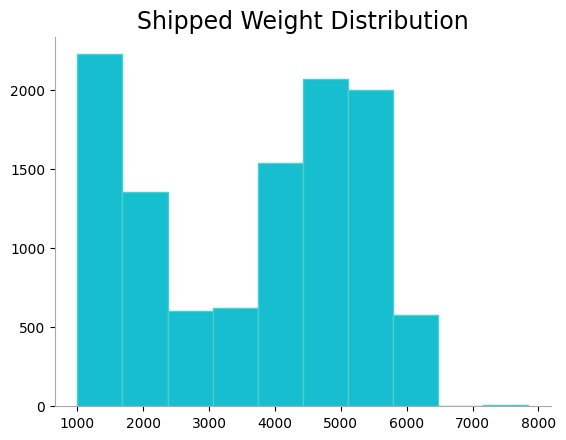

<Figure size 640x480 with 0 Axes>

In [6]:
weight_distribution = dataset['Weight_in_gms']

fig, ax = plt.subplots()

ax.hist(
    x=weight_distribution,
    color='tab:cyan',
    edgecolor='mediumturquoise'
)

ax.set_title('Shipped Weight Distribution', fontsize=17)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('darkgrey')
ax.spines['bottom'].set_color('darkgrey')

path_hist = os.path.join(output_directory, 'weight_distribution.png')
plt.savefig(path_hist)

plt.show()

In [7]:
path_html = os.path.join(output_directory, 'index.html')

with open(path_html, 'w') as file:
    file.write(
        """
<!DOCTYPE html>
<html>
    <body>
        <h1>Shipping Dashboard Example</h1>
        <div style="width:45%;float:left">
            <img src="shipping_per_warehouse.png" alt="Fig 1">
            <img src="mode_of_shipment.png" alt="Fig 2">
        </div>
        <div style="width:45%;float:left">
            <img src="average_customer_rating.png" alt="Fig 3">
            <img src="weight_distribution.png" alt="Fig 4">
        </div>
    </body>
</html>
"""
    )